Apply your algorithm to the sound mixtures to recover the original source.

In [63]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


In [64]:
# Loading the audio files
from scipy.io import wavfile

rate, bigBrain = wavfile.read('data/bigbrain.wav')
_, bach = wavfile.read('data/bach.wav')
_, speech = wavfile.read('data/speech.wav')

In [68]:
bigBrain = bigBrain[0:bach.shape[0]]
print(bigBrain.shape)

(132362,)


In [49]:
def normalize(data):
    data = np.asarray(data).astype('float')
    lbound, ubound = np.min(data), np.max(data)
    norm_data = (data - lbound) / (ubound - lbound)
    norm_data -= 0.5
    return norm_data

In [50]:
data_matrix = normalize([bigBrain, bach])
print(data_matrix)

[[0.00980392 0.00980392 0.00980392 ... 0.08431373 0.08431373 0.09019608]
 [0.0020527  0.00208333 0.00199142 ... 0.07113971 0.06279105 0.04912684]]


In [51]:
def mixer(data):
    n = data.shape[0]
    A = np.random.uniform(size=(n, n))
    mixed_data = A.dot(data)
    return mixed_data, A

In [52]:
X, gTruth = mixer(data_matrix)

In [53]:
def drawDataWithMixingMatrix(data, mat):
    # plot data points
    plt.scatter(data[0], data[1], s=1)
    # calculate axis length
    lenAxis = np.sqrt(np.sum(np.square(mat), axis=0))
    # calculate scale for illustration
    scale = np.min(np.max(np.abs(data), axis=1) / lenAxis.T)
    # draw axis as arrow
    plt.arrow(0, 0, scale * mat[0,0], scale * mat[1,0], shape='full', color='r')
    plt.arrow(0, 0, scale * mat[0,1], scale * mat[1,1], shape='full', color='y')

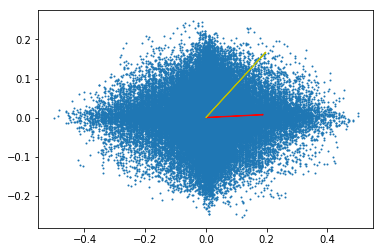

In [54]:
drawDataWithMixingMatrix(data_matrix, gTruth)
plt.show()

In [55]:
def bss(X, max_iter):
    W = np.identity(X.shape[0])
    for i in range(0, max_iter) :
        new_source = np.linalg.inv(W).dot(X)
        dW = - W.dot((new_source.dot(X.T) + np.identity(W.shape[0])))
        likelihood = np.sum(new_source)
        if i % 1000 == 0:
            print("The log likelihood after ", i, " iterations is ", likelihood)
        dC = np.sum(1 / np.exp(new_source)) # Checking if the slope is equal to 0 for convergence
        W -= dW * 0.00001
        if dC == 0:
            break
    return W, new_source

In [56]:
def compareMixingMatrix(data, matA, matB):
    plt.figure(figsize=(16, 8))
    # plot first mixing matrix
    plt.subplot(1,2,1)
    drawDataWithMixingMatrix(data, matA)
    # plot first mixing matrix
    plt.subplot(1,2,2)
    drawDataWithMixingMatrix(data, matB)

In [57]:
print(X)
A, G = bss(X, 10000)

[[0.0112092  0.01123937 0.01114886 ... 0.14907036 0.14084897 0.13290571]
 [0.00207105 0.00209663 0.00201988 ... 0.0624712  0.05550023 0.04430513]]
The log likelihood after  0  iterations is  1578.481426633352
The log likelihood after  1000  iterations is  68.48519392251143
The log likelihood after  2000  iterations is  30.93005896950797
The log likelihood after  3000  iterations is  19.464308524779263
The log likelihood after  4000  iterations is  14.061444690133447
The log likelihood after  5000  iterations is  10.950159148607492
The log likelihood after  6000  iterations is  8.937206917234821
The log likelihood after  7000  iterations is  7.531814207589654
The log likelihood after  8000  iterations is  6.496523745350616
The log likelihood after  9000  iterations is  5.702894701464555


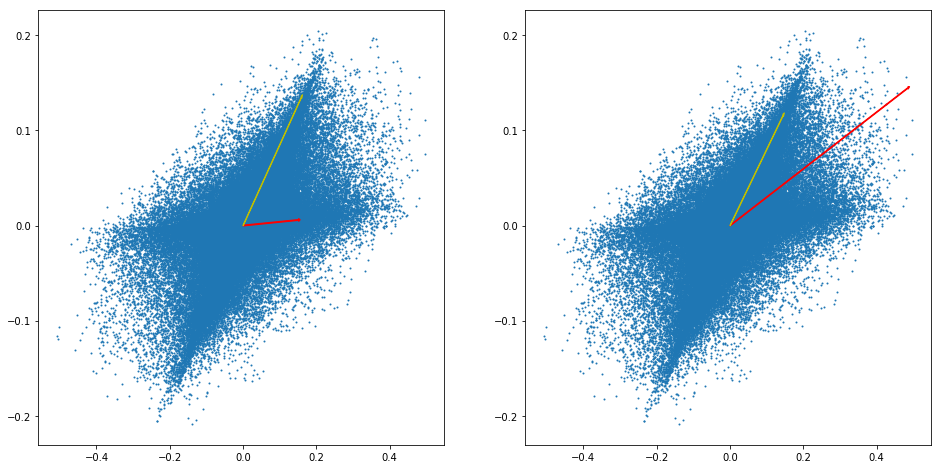

In [58]:
compareMixingMatrix(X, gTruth, A)
plt.show()

In [59]:
print('\nMixing Matrix (Our Estimation)\n\n', A)
print('\nMixing Matrix (Groud Truth)\n\n', gTruth)


Mixing Matrix (Our Estimation)

 [[134.93408873  40.23090758]
 [ 40.23090758  32.18556624]]

Mixing Matrix (Groud Truth)

 [[0.93715491 0.98475726]
 [0.03642264 0.83498051]]


In [60]:
#Running it for a longer time -
A, G = bss(X, 20000)

The log likelihood after  0  iterations is  1578.481426633352
The log likelihood after  1000  iterations is  68.48519392251143
The log likelihood after  2000  iterations is  30.93005896950797
The log likelihood after  3000  iterations is  19.464308524779263
The log likelihood after  4000  iterations is  14.061444690133447
The log likelihood after  5000  iterations is  10.950159148607492
The log likelihood after  6000  iterations is  8.937206917234821
The log likelihood after  7000  iterations is  7.531814207589654
The log likelihood after  8000  iterations is  6.496523745350616
The log likelihood after  9000  iterations is  5.702894701464555
The log likelihood after  10000  iterations is  5.0755510481728265
The log likelihood after  11000  iterations is  4.567412501415894
The log likelihood after  12000  iterations is  4.147587740146272
The log likelihood after  13000  iterations is  3.794982264696743
The log likelihood after  14000  iterations is  3.4947080060565043
The log likelihood

In [61]:
print('\nMixing Matrix (Our Estimation)\n\n', A)
print('\nMixing Matrix (Groud Truth)\n\n', gTruth)


Mixing Matrix (Our Estimation)

 [[282.95407453  84.6929144 ]
 [ 84.6929144   66.65092987]]

Mixing Matrix (Groud Truth)

 [[0.93715491 0.98475726]
 [0.03642264 0.83498051]]


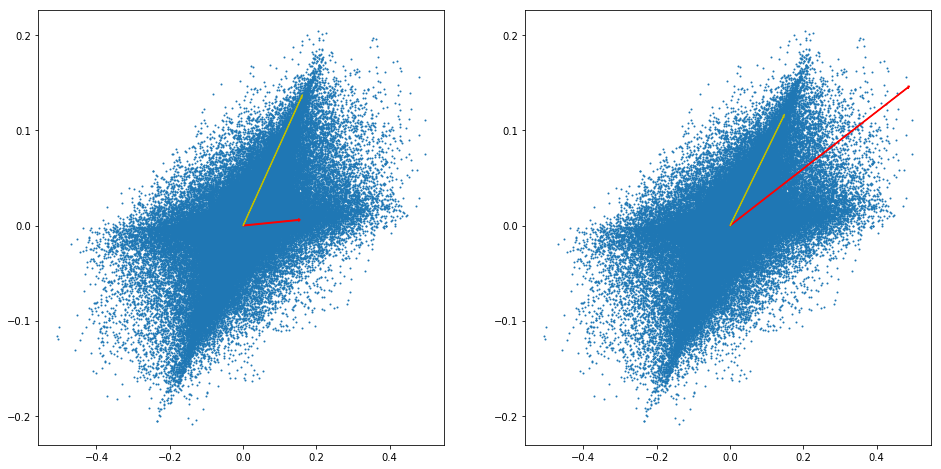

In [62]:
compareMixingMatrix(X, gTruth, A)
plt.show()

Implementation of the same using the scikit learn's FastICA method -  

In [76]:
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA

In [38]:
ica = FastICA(n_components=2, max_iter=100000, tol=0.1)
S_ = ica.fit_transform(X)
A_ = ica.mixing_

In [41]:
#The estimated matrix 
print(S_)

[[-0.70712454 -0.05053952]
 [ 0.70712527  0.0526281 ]]


In [42]:
print('\nMixing Matrix (Groud Truth)\n\n', gTruth)


Mixing Matrix (Groud Truth)

 [[0.55818015 0.44960901]
 [0.95696494 0.27443476]]


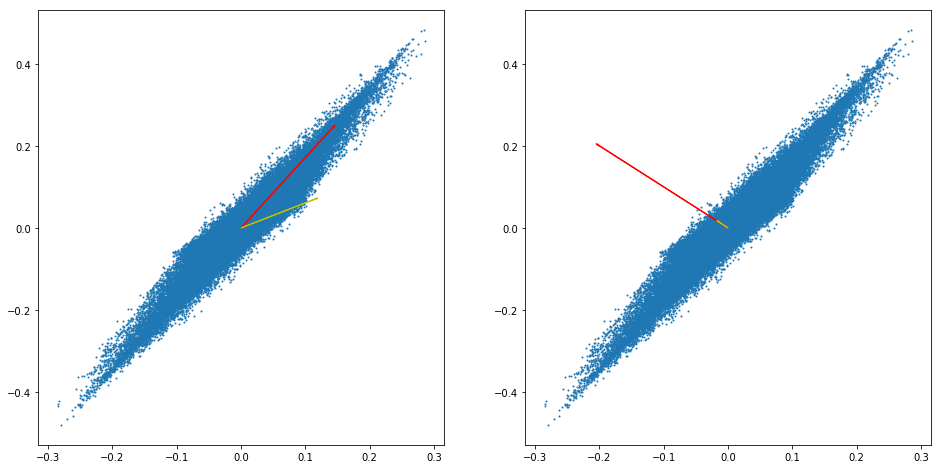

In [43]:
compareMixingMatrix(X, gTruth, S_)
plt.show()

Working on this for 3 mixtures -

In [70]:
data_matrix = normalize([bigBrain, bach, speech])
X, gTruth = mixer(data_matrix)
A, G = bss(X, 10000)

The log likelihood after  0  iterations is  3337.5703843080414
The log likelihood after  1000  iterations is  159.30399016790795
The log likelihood after  2000  iterations is  87.55570063324687
The log likelihood after  3000  iterations is  61.54346270990499
The log likelihood after  4000  iterations is  47.76239497134059
The log likelihood after  5000  iterations is  39.11794049345541
The log likelihood after  6000  iterations is  33.14737919035759
The log likelihood after  7000  iterations is  28.75798685606729
The log likelihood after  8000  iterations is  25.3863389092294
The log likelihood after  9000  iterations is  22.71070498128155


In [71]:
print('\nMixing Matrix (Our Estimation)\n\n', A)
print('\nMixing Matrix (Groud Truth)\n\n', gTruth)


Mixing Matrix (Our Estimation)

 [[ 73.00369656  56.75469194  86.83610791]
 [ 56.75469194  57.88769672  80.48234757]
 [ 86.83610791  80.48234757 124.92020384]]

Mixing Matrix (Groud Truth)

 [[0.82852113 0.10453752 0.22198804]
 [0.61056139 0.53670549 0.59995775]
 [0.97125065 0.76974511 0.0713311 ]]


In [72]:
#Running for a longer time
A, G = bss(X, 15000)

The log likelihood after  0  iterations is  3337.5703843080414
The log likelihood after  1000  iterations is  159.30399016790795
The log likelihood after  2000  iterations is  87.55570063324687
The log likelihood after  3000  iterations is  61.54346270990499
The log likelihood after  4000  iterations is  47.76239497134059
The log likelihood after  5000  iterations is  39.11794049345541
The log likelihood after  6000  iterations is  33.14737919035759
The log likelihood after  7000  iterations is  28.75798685606729
The log likelihood after  8000  iterations is  25.3863389092294
The log likelihood after  9000  iterations is  22.71070498128155
The log likelihood after  10000  iterations is  20.533238111758262
The log likelihood after  11000  iterations is  18.725222940749735
The log likelihood after  12000  iterations is  17.199125086810508
The log likelihood after  13000  iterations is  15.893245285861992
The log likelihood after  14000  iterations is  14.762789461047632


In [73]:
print('\nMixing Matrix (Our Estimation)\n\n', A)
print('\nMixing Matrix (Groud Truth)\n\n', gTruth)


Mixing Matrix (Our Estimation)

 [[111.79738014  87.33261593 133.62110166]
 [ 87.33261593  88.53728017 123.84410361]
 [133.62110166 123.84410361 191.68512573]]

Mixing Matrix (Groud Truth)

 [[0.82852113 0.10453752 0.22198804]
 [0.61056139 0.53670549 0.59995775]
 [0.97125065 0.76974511 0.0713311 ]]


In [75]:
#Saving the files
wavfile.write('data/deMixedTrack1.wav', rate, G[0])
wavfile.write('data/deMixedTrack2.wav', rate, G[1])
wavfile.write('data/deMixedTrack3.wav', rate, G[2])

If you hear the sound you'll hear that the bss does a good job at seperating the signals but the signals are still a little mixed. I have used PCA below to do the same for comparison.

In [77]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

In [79]:
print('\nMixing Matrix (Our Estimation)\n\n', H)
print('\nMixing Matrix (Groud Truth)\n\n', gTruth)


Mixing Matrix (Our Estimation)

 [[-5.49702949e+00 -5.26031574e+00  6.37019077e-14]
 [-2.90365481e+00  6.46710630e+00  6.37019077e-14]
 [ 8.40068430e+00 -1.20679056e+00  6.37019077e-14]]

Mixing Matrix (Groud Truth)

 [[0.82852113 0.10453752 0.22198804]
 [0.61056139 0.53670549 0.59995775]
 [0.97125065 0.76974511 0.0713311 ]]


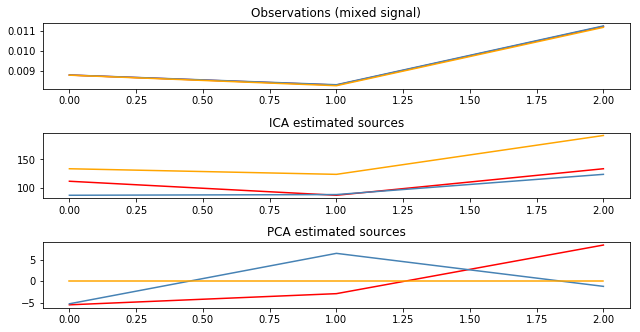

In [80]:
# Plotting the signals
plt.figure(figsize=(9, 6))

models = [X, A, H]
names = ['Observations (mixed signal)',
         'ICA estimated sources',
         'PCA estimated sources']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()